In [ ]:
!pip install deepface


In [ ]:
rm -rf /kaggle/working/*

In [ ]:
import cv2
import os
from deepface import DeepFace

dataset_dir = "/kaggle/input/trial-dataset/Trial dataset"

# Create output directories if they don't exist
output_dir_faces = "/kaggle/working/stored_faces"
output_dir_group_images = "/kaggle/working/group_images"
os.makedirs(output_dir_faces, exist_ok=True)
os.makedirs(output_dir_group_images, exist_ok=True)

backends = [
    'opencv', 
    'ssd', 
    'dlib', 
    'mtcnn', 
    'retinaface', 
    'mediapipe',
    'yolov8',
    'yunet',
    'fastmtcnn',
]

In [ ]:
# Function to compare faces and update group images
def compare_and_update_faces(face_image, group_image_path):
    for face_file in sorted(os.listdir(output_dir_faces)):
        known_face_path = os.path.join(output_dir_faces, face_file)
        match = DeepFace.verify(img1_path=face_image, img2_path=known_face_path, enforce_detection=False)
        if match['distance'] < 0.24:
            # If the distance is below the threshold, consider it a match
            match['verified'] = True
            # Update the corresponding txt file with the path of the group photo
            txt_file_path = os.path.join(output_dir_group_images, f"face_{face_file.split('_')[1]}_group_image.txt")
            if os.path.exists(txt_file_path):
                with open(txt_file_path, 'a') as f:
                    f.write("\n" + group_image_path.strip())
            return True
    return False

In [ ]:
# Initialize i to 1
i = 1

# Iterate over each image in the dataset
for image_name in os.listdir(dataset_dir):
    image_path = os.path.join(dataset_dir, image_name)
    
    # Extract faces from the current image
    face_objs = DeepFace.extract_faces(img_path=image_path, detector_backend=backends[4])
    
    print(f"Processing {image_name}: {len(face_objs)} faces found")
    
    # Process each detected face
    for face_index, face_obj in enumerate(face_objs):
        # Extract face region from the original image
        x, y, w, h = face_obj['facial_area']['x'], face_obj['facial_area']['y'], face_obj['facial_area']['w'], face_obj['facial_area']['h']
        face_region = cv2.imread(image_path)[y:y+h, x:x+w]
        
        # Compare the detected face with stored faces and update group images
        if not compare_and_update_faces(face_region, image_path):
            # Save the extracted face region
            output_face_path = os.path.join(output_dir_faces, f"Face_{i}.jpg")
            cv2.imwrite(output_face_path, face_region)
            
            # Save the path of the image in the group images directory
            group_image_path = os.path.join(output_dir_group_images, f"face_{i}_group_image.txt")
            with open(group_image_path, 'w') as f:
                f.write(image_path)
            
            # Increment i
            i += 1

In [ ]:
import os

# Array to store ages of each face
ages = []

# Iterate over each stored face image
for face_file in os.listdir(output_dir_faces):
    face_image_path = os.path.join(output_dir_faces, face_file)
    
    # Analyze the age of the current face
    age_analysis = DeepFace.analyze(img_path=face_image_path, actions=['age'], enforce_detection=False)
    
    # Check if age detection was successful
    if 'age' in age_analysis:
        age = age_analysis['age']
        ages.append(age)
    else:
        print(f"Age detection failed for {face_image_path}")

# Display the ages of each face
print("Ages of each face:")
for i, age in enumerate(ages):
    print(f"Face {i+1}: {age} years")


In [ ]:
import matplotlib.pyplot as plt

# Load the image
face1_image = cv2.imread('/kaggle/working/stored_faces/Face_27.jpg')

# Check if the image was loaded successfully
if face1_image is not None:
    # Convert BGR image to RGB
    face1_image_rgb = cv2.cvtColor(face1_image, cv2.COLOR_BGR2RGB)
    
    # Display the image using Matplotlib
    plt.imshow(face1_image_rgb)
    plt.axis('off')
    plt.title("Face_1")
    plt.show()
else:
    print("Failed to load Face_1 image.")


In [ ]:
# Get the path of the group image associated with the first face
face1_group_image_path = None
face1_group_image_txt = os.path.join(output_dir_group_images, "face_1_group_image.txt")
if os.path.exists(face1_group_image_txt):
    with open(face1_group_image_txt, 'r') as f:
        lines = f.readlines()
        if lines:
            face1_group_image_path = lines[0].strip()

# Display the path of the group image associated with the first face
if face1_group_image_path:
    print(f"The image stored in face1 is: {face1_group_image_path}")
else:
    print("No image stored in face1.")


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Check if the group image path is available
if face1_group_image_path:
    # Load and display the group image
    group_image = mpimg.imread(face1_group_image_path)
    plt.imshow(group_image)
    plt.axis('off')
    plt.title("Group Image Associated with Face_1")
    plt.show()
else:
    print("No group image stored for Face_1.")


In [ ]:
from deepface import DeepFace

# Check if the group image path is available
if face1_group_image_path:
    # Analyze the age of faces in the group image
    age_analysis = DeepFace.analyze(img_path=face1_group_image_path, actions=['age'])
    
    # Display the age of faces
    print("Age of faces in the group image:")
    for i, face_analysis in enumerate(age_analysis):
        age = face_analysis['age']
        print(f"Face {i+1}: {age} years")
else:
    print("No group image stored for Face_1.")


In [ ]:
image_path = "/kaggle/input/trial-dataset/Trial dataset/4Y1A0081.JPG"
if image_path:
    # Analyze the age of faces in the group image
    age_analysis = DeepFace.analyze(img_path=image_path, actions=['age'])
    
    # Display the age of faces
    print("Age of faces in the group image:")
    for i, face_analysis in enumerate(age_analysis):
        age = face_analysis['age']
        print(f"Face {i+1}: {age} years")
else:
    print("No group image stored for Face_1.")

In [ ]:
age_analysis = DeepFace.analyze(img_path=image_path, actions=['age'])
age_analysis

In [ ]:
age_analysis = DeepFace.analyze(img_path='/kaggle/input/random-data/v3_0864171.jpg', actions=['age'])
age_analysis

In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the pretrained age model
age_model = load_model('/kaggle/input/age-model/age_model_pretrained.h5')

In [ ]:
image = cv2.imread('/kaggle/input/random-data/v3_0864171.jpg')

In [ ]:
age_prediction = age_model.predict(np.expand_dims(image, axis=0))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the pre-trained model
age_model = load_model("/kaggle/input/age-model/age_model_pretrained.h5")

def preprocess_image(image_path):
    # Read and decode the image
    image = tf.io.read_file(image_path)
    image = tf.io.decode_jpeg(image, channels=1)  # Convert to grayscale
    # Resize the image to match the model's input shape
    image = tf.image.resize(image, [200, 200])
    # Convert image to float32
    image = tf.image.convert_image_dtype(image, tf.float32)
    # Normalize the pixel values
    image = image / 255.0  # Assuming the model was trained with pixel values in [0, 255]
    return image


# Define a function to predict age
def predict_age(image_path):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)
    # Add batch dimension
    preprocessed_image = tf.expand_dims(preprocessed_image, axis=0)
    # Make predictions
    predictions = age_model.predict(preprocessed_image)
    # Post-process the predictions if necessary
    # For example, you can take the argmax to get the predicted age class
    predicted_age_class = predictions.argmax(axis=-1)[0]
    return predicted_age_class

# Example usage:
image_path = "/kaggle/working/stored_faces/Face_3.jpg"
predicted_age_class = predict_age(image_path)
print("Predicted age class:", predicted_age_class)


In [ ]:
import tensorflow as tf

# Function to preprocess a single image
def preprocess_image(image_path):
    # Read image from file
    image = tf.io.read_file(image_path)
    # Decode image and convert to grayscale
    image = tf.io.decode_jpeg(image, channels=1)
    # Resize the image to match the input size of the pretrained model
    image = tf.image.resize(image, [200, 200])
    # Normalize pixel values
    image = tf.cast(image, tf.float32) / 255.0
    return image

# Function to predict age class from a single image
def predict_age(image_path, model):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)
    # Add batch dimension
    preprocessed_image = tf.expand_dims(preprocessed_image, axis=0)
    # Make predictions
    predictions = model.predict(preprocessed_image)
    # Post-process the predictions if necessary
    # For example, you can take the argmax to get the predicted age class
    predicted_age_class = predictions.argmax(axis=-1)[0]
    return predicted_age_class

# Example usage:
final_cnn = load_model("/kaggle/input/age-model/age_model_pretrained.h5")
image_path = "/kaggle/input/random-data/v3_0864171.jpg"  # Replace with the path to your image
predicted_age_class = predict_age(image_path, final_cnn)
print("Predicted age class:", predicted_age_class)


## Using OpenCV and Caffe

In [ ]:
!pip install opencv-python-headless


In [ ]:
# Import required modules
import cv2 as cv
import math
import time
import matplotlib.pyplot as plt

# Function to display images in Kaggle
def kaggle_display_image(image):
    plt.figure(figsize=(8, 6))
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


In [ ]:
faceProto = "/content/opencv_face_detector.pbtxt"
faceModel = "/content/opencv_face_detector_uint8.pb"
ageProto = "/content/age_deploy.prototxt"
ageModel = "/content/age_net.caffemodel"
genderProto = "/content/gender_deploy.prototxt"
genderModel = "/content/gender_net.caffemodel"

In [ ]:
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
genderList = ['Male', 'Female']

In [ ]:
# Load network
ageNet = cv.dnn.readNet(ageModel, ageProto)
genderNet = cv.dnn.readNet(genderModel, genderProto)
faceNet = cv.dnn.readNet(faceModel, faceProto)

In [ ]:
!pip install deepface


In [ ]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt

In [ ]:
img_path = '/kaggle/input/age-testing-image-woman/test_image.jpeg'

In [ ]:
img = cv2.imread(img_path)

In [ ]:
plt.imshow(img[:,:,::-1])

In [ ]:
demography = DeepFace.analyze(img_path)

In [ ]:
demography_objs = DeepFace.analyze(img_path)
for demography in demography_objs:
   print(demography["age"])

## Open CV and Caffe

In [ ]:
import cv2
import math


In [ ]:
def highlightFace(net, frame, conf_threshold=0.7):
    frameOpencvDnn=frame.copy()
    frameHeight=frameOpencvDnn.shape[0]
    frameWidth=frameOpencvDnn.shape[1]
    blob=cv2.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False)

    net.setInput(blob)
    detections=net.forward()
    faceBoxes=[]
    for i in range(detections.shape[2]):
        confidence=detections[0,0,i,2]
        if confidence>conf_threshold:
            x1=int(detections[0,0,i,3]*frameWidth)
            y1=int(detections[0,0,i,4]*frameHeight)
            x2=int(detections[0,0,i,5]*frameWidth)
            y2=int(detections[0,0,i,6]*frameHeight)
            faceBoxes.append([x1,y1,x2,y2])
            cv2.rectangle(frameOpencvDnn, (x1,y1), (x2,y2), (0,255,0), int(round(frameHeight/150)), 8)
    return frameOpencvDnn,faceBoxes

In [ ]:
# Replace with your actual image path
image_path = '/kaggle/input/test-img/test.img'

#Defining Model and Proto files:
faceProto="/kaggle/input/gender-age-data/opencv_face_detector.pbtxt"
faceModel="/kaggle/input/gender-age-data/opencv_face_detector_uint8.pb"
ageProto="/kaggle/input/gender-age-data/age_deploy.prototxt"
ageModel="/kaggle/input/gender-age-data/age_net.caffemodel"
genderProto="/kaggle/input/age-gender-dataaddtiion/gender_deploy.prototxt"
genderModel="/kaggle/input/gender-age-data/gender_net.caffemodel" 

#Defining Model Mean Values and Lists:
MODEL_MEAN_VALUES=(78.4263377603, 87.7689143744, 114.895847746)
ageList=['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
genderList=['Male','Female']

In [ ]:
#Loading Pre-Trained Models
faceNet=cv2.dnn.readNet(faceModel,faceProto)
ageNet=cv2.dnn.readNet(ageModel,ageProto)
genderNet=cv2.dnn.readNet(genderModel,genderProto)

In [ ]:
video=cv2.VideoCapture(image_path if image_path else 0)
padding=20
while cv2.waitKey(1)<0:
    hasFrame,frame=video.read()
    if not hasFrame:
        cv2.waitKey()
        break 
# Checking if face detected or not
    resultImg,faceBoxes=highlightFace(faceNet,frame)
    if not faceBoxes:
        print("No face detected")
#Create the bounding box
    for faceBox in faceBoxes:
        face=frame[max(0,faceBox[1]-padding):
                   min(faceBox[3]+padding,frame.shape[0]-1),max(0,faceBox[0]-padding)
                   :min(faceBox[2]+padding, frame.shape[1]-1)]

# Identifying the face blob from the image
        blob=cv2.dnn.blobFromImage(face, 1.0, (227,227), MODEL_MEAN_VALUES, swapRB=False)
        genderNet.setInput(blob)
        genderPreds=genderNet.forward()
        gender=genderList[genderPreds[0].argmax()]
        print(f'Gender: {gender}')

        ageNet.setInput(blob)
        agePreds=ageNet.forward()
        age=ageList[agePreds[0].argmax()]
        print(f'Age: {age[1:-1]} years')

        cv2.putText(resultImg, f'{gender}, {age}', (faceBox[0], faceBox[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,255), 2, cv2.LINE_AA)
        cv2.imshow("Detecting age and gender", resultImg)

In [ ]:
import cv2

# Load the pre-trained models
faceNet = cv2.dnn.readNetFromCaffe("/kaggle/input/age-gender-pb/deploy.prototxt", "/kaggle/input/age-gender-pb/weights.caffemodel")
genderNet = cv2.dnn.readNetFromCaffe("/kaggle/input/age-gender-pb/gender.prototxt", "/kaggle/input/age-gender-pb/gender.caffemodel")
ageNet = cv2.dnn.readNetFromCaffe("/kaggle/input/age-gender-pb/age.prototxt", "/kaggle/input/age-gender-pb/age.caffemodel")

# Define the gender list
genderList = ['Male', 'Female']

# Define the age list
ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']

# Load the image
image_path = "/kaggle/input/test-img/test.img"
frame = cv2.imread(image_path)

# Define padding
padding = 20

# Checking if face detected or not
resultImg, faceBoxes = highlightFace(faceNet, frame)
if not faceBoxes:
    print("No face detected")
else:
    # Create the bounding box
    for faceBox in faceBoxes:
        face = frame[max(0, faceBox[1] - padding):min(faceBox[3] + padding, frame.shape[0] - 1),
                     max(0, faceBox[0] - padding):min(faceBox[2] + padding, frame.shape[1] - 1)]

        # Identify the face blob from the image
        blob = cv2.dnn.blobFromImage(face, 1.0, (227, 227), (78.4263377603, 87.7689143744, 114.895847746), swapRB=False)
        genderNet.setInput(blob)
        genderPreds = genderNet.forward()
        gender = genderList[genderPreds[0].argmax()]
        print(f'Gender: {gender}')

        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        age = ageList[agePreds[0].argmax()]
        print(f'Age: {age[1:-1]} years')

        cv2.putText(resultImg, f'{gender}, {age}', (faceBox[0], faceBox[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8,
                    (0, 255, 255), 2, cv2.LINE_AA)

# Display the result image
cv2.imshow("Detecting age and gender", resultImg)

In [ ]:
rm -rf /kaggle/working/*

In [ ]:
import cv2
import os
from deepface import DeepFace

dataset_dir = "/kaggle/input/trial-dataset/Trial dataset"

# Create output directories if they don't exist
output_dir_faces = "/kaggle/working/stored_faces"
output_dir_group_images = "/kaggle/working/group_images"
os.makedirs(output_dir_faces, exist_ok=True)
os.makedirs(output_dir_group_images, exist_ok=True)

backends = [
    'opencv', 
    'ssd', 
    'dlib', 
    'mtcnn', 
    'retinaface', 
    'mediapipe',
    'yolov8',
    'yunet',
    'fastmtcnn',
]

# Function to compare faces and update group images
def compare_and_update_faces(face_image, group_image_path):
    for face_file in os.listdir(output_dir_faces):
        known_face_path = os.path.join(output_dir_faces, face_file)
        match = DeepFace.verify(img1_path=face_image, img2_path=known_face_path, enforce_detection=False)
        if match['distance'] < 0.24:
            # If the distance is below the threshold, consider it a match
            match['verified'] = True
            # Update the corresponding txt file with the path of the group photo
            txt_file_path = os.path.join(output_dir_group_images, f"face_{face_file.split('_')[1]}_group_image.txt")
            if os.path.exists(txt_file_path):
                with open(txt_file_path, 'r') as f:
                    lines = f.readlines()
                    if group_image_path.strip() not in lines:
                        with open(txt_file_path, 'a') as f:
                            f.write("\n" + group_image_path.strip())
            return True
    return False

# Iterate over each image in the dataset
for image_name in os.listdir(dataset_dir):
    image_path = os.path.join(dataset_dir, image_name)
    
    # Extract faces from the current image
    face_objs = DeepFace.extract_faces(img_path=image_path, detector_backend=backends[4])
    
    print(f"Processing {image_name}: {len(face_objs)} faces found")
    
    # Process each detected face
    for face_index, face_obj in enumerate(face_objs):
        # Extract face region from the original image
        x, y, w, h = face_obj['facial_area']['x'], face_obj['facial_area']['y'], face_obj['facial_area']['w'], face_obj['facial_area']['h']
        face_region = cv2.imread(image_path)[y:y+h, x:x+w]
        
        # Save the extracted face region
        output_face_path = os.path.join(output_dir_faces, f"Face_{len(os.listdir(output_dir_faces)) + 1}.jpg")
        cv2.imwrite(output_face_path, face_region)
        
        # Save the path of the image in the group images directory
        group_image_path = os.path.join(output_dir_group_images, f"face_{len(os.listdir(output_dir_faces))}_group_image.txt")
        with open(group_image_path, 'w') as f:
            f.write(image_path)
        
        # Compare the detected face with stored faces and update group images
        if not compare_and_update_faces(output_face_path, image_path):
            # If the face is not already stored, create a new directory and txt file for the group image
            new_face_dir = os.path.join(output_dir_group_images, f"face_{len(os.listdir(output_dir_faces))}_group_image")
            os.makedirs(new_face_dir, exist_ok=True)
            new_face_txt_path = os.path.join(new_face_dir, "group_image.txt")
            with open(new_face_txt_path, 'w') as f:
                f.write(image_path)
            
            # Analyze the face for gender and facial structure
            try:
                analysis = DeepFace.analyze(img_path=output_face_path, actions=['gender', 'facial_features'])
                gender = analysis['gender']
                facial_features = analysis['facial_features']
                
                # Determine if the face belongs to a child or an adult based on gender and facial features
                if gender == 'Man' or gender == 'Woman':
                    if 'jawline' in facial_features and 'cheekbones' in facial_features and 'chin' in facial_features:
                        print("Adult detected")
                    else:
                        print("Child detected")
                else:
                    print("Gender not recognized")
            except Exception as e:
                print(f"Error analyzing face: {e}")


In [ ]:
img_path = "/kaggle/input/random-data/v3_0864171.jpg"

In [ ]:
img = cv2.imread(img_path)

In [ ]:
plt.imshow(img[:,:,::-1])

In [ ]:
analysis = DeepFace.analyze(img_path=img_path, actions=['age'])
analysis             

In [ ]:
                # Determine if the face belongs to a child or an adult based on gender and facial features
                if gender == 'Man' or gender == 'Woman':
                    if 'jawline' in facial_features and 'cheekbones' in facial_features and 'chin' in facial_features:
                        print("Adult detected")
                    else:
                        print("Child detected")
                else:
                    print("Gender not recognized")
            except Exception as e:
                print(f"Error analyzing face: {e}")

In [ ]:
!pip install dlib

In [ ]:
rm -rf /kaggle/working/*

In [ ]:
import cv2 
import dlib 
import numpy as np 
  
#img = cv2.imread('/kaggle/input/random-data/v3_0864171.jpg') 
#img = cv2.resize(img, (720, 64x`0)) 
#frame = img.copy() 
  

In [ ]:
# ------------ Model for Age detection --------# 
age_weights = "/kaggle/input/gender-age-data/age_deploy.prototxt"
age_config = "/kaggle/input/gender-age-data/age_net.caffemodel"
age_Net = cv2.dnn.readNet(age_config, age_weights) 
  
# Model requirements for image 
ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', 
           '(25-32)', '(38-43)', '(48-53)', '(60-100)'] 
model_mean = (78.4263377603, 87.7689143744, 114.895847746) 
  
# storing the image dimensions 
fH = img.shape[0] 
fW = img.shape[1] 
  
Boxes = []  # to store the face co-ordinates 
mssg = 'Face Detected'  # to display on image 
  
# ------------- Model for face detection---------# 
face_detector = dlib.get_frontal_face_detector() 
# converting to grayscale 
img_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
  
# -------------detecting the faces--------------# 
faces = face_detector(img_gray) 
  
# If no faces our detected 
if not faces: 
    mssg = 'No face detected'
    cv2.putText(img, f'{mssg}', (40, 40), 
                cv2.FONT_HERSHEY_SIMPLEX, 2, (200), 2) 
    cv2.imshow('Age detected', img) 
    cv2.waitKey(0) 
  
else: 
    # --------- Bounding Face ---------# 
    for face in faces: 
        x = face.left()  # extracting the face coordinates 
        y = face.top() 
        x2 = face.right() 
        y2 = face.bottom() 
  
        # rescaling those coordinates for our image 
        box = [x, y, x2, y2] 
        Boxes.append(box) 
        cv2.rectangle(frame, (x, y), (x2, y2),  
                      (00, 200, 200), 2) 
  
    for box in Boxes: 
        face = frame[box[1]:box[3], box[0]:box[2]] 
  
        # ----- Image preprocessing --------# 
        blob = cv2.dnn.blobFromImage( 
            face, 1.0, (227, 227), model_mean, swapRB=False) 
  
        # -------Age Prediction---------# 
        age_Net.setInput(blob) 
        age_preds = age_Net.forward() 
        age = ageList[age_preds[0].argmax()] 
  
        cv2.putText(frame, f'{mssg}:{age}', (box[0], 
                                             box[1] - 10),  
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, 
                    (0, 255, 255), 2, cv2.LINE_AA) 
  
        cv2.imshow("Detecting Age", frame) 
        cv2.waitKey(0) 

# WORKING AGE DETECTION MODEL

## CAFFE MODEL FOR AGE ESTIMATION

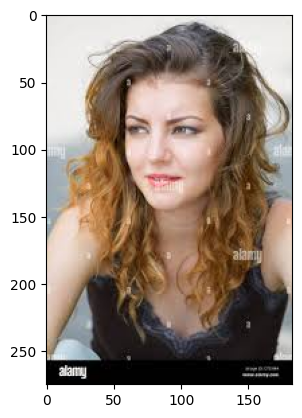

In [205]:
img_path = '/kaggle/input/age-testing-image-woman/test_image.jpeg'
img = cv2.imread(img_path)

plt.imshow(img[:,:,::-1])

In [206]:
import cv2
import os
from deepface import DeepFace

# Function to perform age detection
def detect_age(face_region):
    age_weights = "/kaggle/input/gender-age-data/age_deploy.prototxt"
    age_config = "/kaggle/input/gender-age-data/age_net.caffemodel"
    age_Net = cv2.dnn.readNet(age_config, age_weights)
    ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
    model_mean = (78.4263377603, 87.7689143744, 114.895847746)
    blob = cv2.dnn.blobFromImage(face_region, 1.0, (227, 227), model_mean, swapRB=False)
    age_Net.setInput(blob)
    age_preds = age_Net.forward()
    age = ageList[age_preds[0].argmax()]
    return age

# Assuming img is the original image
first_image_path = '/kaggle/input/test-img/test.img'
output_dir = '/kaggle/working/stored_faces'  

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Detect faces and align them using DeepFace
face_objs = DeepFace.extract_faces(img_path=first_image_path, detector_backend='retinaface')

# Iterate over each detected face object
for face_index, face_obj in enumerate(face_objs):
    x, y, w, h = face_obj['facial_area']['x'], face_obj['facial_area']['y'], face_obj['facial_area']['w'], face_obj['facial_area']['h']
    face_region = cv2.imread(first_image_path)[y:y+h, x:x+w]

    # Save the extracted face region to the output directory
    output_face_path = os.path.join(output_dir, f"Face_{face_index + 1}.jpg")
    cv2.imwrite(output_face_path, face_region)

    # Perform age detection on the extracted face
    age = detect_age(face_region)
    
    # Display the age prediction
    print(f"Age of Face_{face_index + 1}: {age}")



Age of Face_1: (15-20)


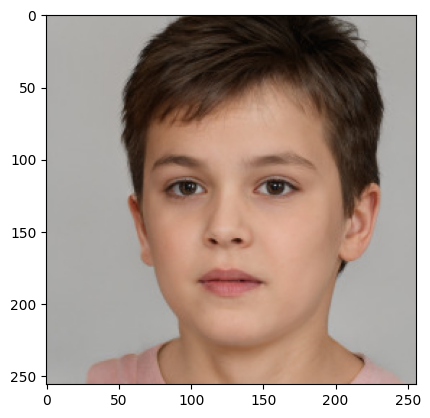

In [207]:
img_path = '/kaggle/input/random-data/v3_0864171.jpg'
img = cv2.imread(img_path)

plt.imshow(img[:,:,::-1])

In [208]:
import cv2
import os
from deepface import DeepFace

# Function to perform age detection
def detect_age(face_region):
    age_weights = "/kaggle/input/gender-age-data/age_deploy.prototxt"
    age_config = "/kaggle/input/gender-age-data/age_net.caffemodel"
    age_Net = cv2.dnn.readNet(age_config, age_weights)
    ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
    model_mean = (78.4263377603, 87.7689143744, 114.895847746)
    blob = cv2.dnn.blobFromImage(face_region, 1.0, (227, 227), model_mean, swapRB=False)
    age_Net.setInput(blob)
    age_preds = age_Net.forward()
    age = ageList[age_preds[0].argmax()]
    return age

# Assuming img is the original image
first_image_path = '/kaggle/input/random-data/v3_0864171.jpg'
output_dir = '/kaggle/working/stored_faces'  

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Detect faces and align them using DeepFace
face_objs = DeepFace.extract_faces(img_path=first_image_path, detector_backend='retinaface')

# Iterate over each detected face object
for face_index, face_obj in enumerate(face_objs):
    x, y, w, h = face_obj['facial_area']['x'], face_obj['facial_area']['y'], face_obj['facial_area']['w'], face_obj['facial_area']['h']
    face_region = cv2.imread(first_image_path)[y:y+h, x:x+w]

    # Save the extracted face region to the output directory
    output_face_path = os.path.join(output_dir, f"Face_{face_index + 1}.jpg")
    cv2.imwrite(output_face_path, face_region)

    # Perform age detection on the extracted face
    age = detect_age(face_region)
    
    # Display the age prediction
    print(f"Age of Face_{face_index + 1}: {age}")



Age of Face_1: (8-12)


# Function to detect age:

In [166]:
rm -rf /kaggle/working/*

In [167]:
import cv2
import os
from deepface import DeepFace

dataset_dir = "/kaggle/input/trial-dataset/Trial dataset"

# Create output directories if they don't exist
output_dir_faces = "/kaggle/working/stored_faces"
output_dir_group_images = "/kaggle/working/group_images"
os.makedirs(output_dir_faces, exist_ok=True)
os.makedirs(output_dir_group_images, exist_ok=True)

backends = [
    'opencv', 
    'ssd', 
    'dlib', 
    'mtcnn', 
    'retinaface', 
    'mediapipe',
    'yolov8',
    'yunet',
    'fastmtcnn',
]

In [168]:
# Function to perform age detection
def detect_age(face_region):
    age_weights = "/kaggle/input/gender-age-data/age_deploy.prototxt"
    age_config = "/kaggle/input/gender-age-data/age_net.caffemodel"
    age_Net = cv2.dnn.readNet(age_config, age_weights)
    ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
    model_mean = (78.4263377603, 87.7689143744, 114.895847746)
    blob = cv2.dnn.blobFromImage(face_region, 1.0, (227, 227), model_mean, swapRB=False)
    age_Net.setInput(blob)
    age_preds = age_Net.forward()
    age = ageList[age_preds[0].argmax()]
    return age

In [169]:
import cv2
import os
from deepface import DeepFace
import matplotlib.pyplot as plt
import shutil
import tempfile

# Function to compare faces and update group images
def compare_and_update_faces(face_image, group_image_path):
    match_found = False
    for face_file in os.listdir(output_dir_faces):
        known_face_path = os.path.join(output_dir_faces, face_file)
        match = DeepFace.verify(img1_path=face_image, img2_path=known_face_path, enforce_detection=False)
        if match['distance'] < 0.29:
            # If the distance is below the threshold, consider it a match
            match['verified'] = True
            # Update the corresponding txt file with the path of the group photo
            txt_file_path = os.path.join(output_dir_group_images, f"face_{face_file.split('_')[1].split('.')[0]}_group_image.txt")
            if os.path.exists(txt_file_path):
                with open(txt_file_path, 'a') as f:
                    f.write("\n" + group_image_path.strip())  # Append the group image path
                # Indicate that a match is found
                match_found = True
                # Create a temporary directory for storing face images
                # temp_dir = tempfile.mkdtemp()
                # Save the face image to a temporary file
                # temp_image_path = os.path.join(temp_dir, f"temp_face_{face_file.split('_')[1].split('.')[0]}.jpg")
                # cv2.imwrite(temp_image_path, face_image)
                # Load the images for display
                # temp_image = plt.imread(temp_image_path)
                # stored_face_image = plt.imread(known_face_path)
                # Display the images
                # fig, axes = plt.subplots(1, 2, figsize=(10, 5))
                # axes[0].imshow(temp_image)
                # axes[0].axis('off')
                # axes[0].set_title("Temporary Face Image")
                
                # axes[1].imshow(stored_face_image)
                # axes[1].axis('off')
                # axes[1].set_title("Stored Face Image")
                
                # plt.show()
                break  # Exit the loop after the first match
    if match_found:
        print(f"Detected face is similar to {face_file}. Added to {txt_file_path}.")
    return match_found


In [170]:
# Initialize i to 1
i = 1

# Array to store ages
face_ages = []

# Iterate over each image in the dataset
for image_name in os.listdir(dataset_dir):
    image_path = os.path.join(dataset_dir, image_name)
    
    # Extract faces from the current image
    face_objs = DeepFace.extract_faces(img_path=image_path, detector_backend=backends[4])
    
    print(f"Processing {image_name}: {len(face_objs)} faces found")
    # Process each detected face
    for face_index, face_obj in enumerate(face_objs):
        # Extract face region from the original image
        x, y, w, h = face_obj['facial_area']['x'], face_obj['facial_area']['y'], face_obj['facial_area']['w'], face_obj['facial_area']['h']
        face_region = cv2.imread(image_path)[y:y+h, x:x+w]
        match_found = compare_and_update_faces(face_region, image_path)
        # Compare the detected face with stored faces and update group images
        if not match_found:
            # Save the extracted face region
            output_face_path = os.path.join(output_dir_faces, f"Face_{i}.jpg")
            cv2.imwrite(output_face_path, face_region)
            
            # Save the path of the image in the group images directory
            group_image_path = os.path.join(output_dir_group_images, f"face_{i}_group_image.txt")
            with open(group_image_path, 'w') as f:
                f.write(image_path)
            
            # Detect age of the face
            age = detect_age(face_region)
            face_ages.append(age)
            
            # Increment i
            i += 1

# Print the ages of the detected faces
print("Ages of detected faces:")
for age in face_ages:
    print(age)

Processing JOY_0229.JPG: 8 faces found
Processing 4Y1A9313.JPG: 3 faces found
Processing 4Y1A0003.JPG: 11 faces found
Detected face is similar to Face_2.jpg. Added to /kaggle/working/group_images/face_2_group_image.txt.
Detected face is similar to Face_10.jpg. Added to /kaggle/working/group_images/face_10_group_image.txt.
Processing DSC06931.JPG: 5 faces found
Detected face is similar to Face_18.jpg. Added to /kaggle/working/group_images/face_18_group_image.txt.
Detected face is similar to Face_13.jpg. Added to /kaggle/working/group_images/face_13_group_image.txt.
Processing 4Y1A9258.JPG: 3 faces found
Detected face is similar to Face_13.jpg. Added to /kaggle/working/group_images/face_13_group_image.txt.
Processing 4Y1A0002.JPG: 11 faces found
Detected face is similar to Face_15.jpg. Added to /kaggle/working/group_images/face_15_group_image.txt.
Detected face is similar to Face_19.jpg. Added to /kaggle/working/group_images/face_19_group_image.txt.
Detected face is similar to Face_13.jp

In [171]:
import os

# Path to the directory where the stored faces are saved
stored_faces_dir = "/kaggle/working/stored_faces"

# Path to the directory where the face group images txt files are saved
face_group_images_dir = "/kaggle/working/group_images"

# Initialize the arrays to store the data
stored_faces_ids = []
stored_faces_imgs = []
face_group_images = []

# Iterate over the stored faces directory to get the face IDs and image paths
for filename in os.listdir(stored_faces_dir):
    if filename.endswith(".jpg"):
        face_id = filename.split("_")[1].split(".")[0]  # Extracting the face ID from the filename
        img_path = os.path.join(stored_faces_dir, filename)  # Full path to the image
        stored_faces_ids.append(face_id)
        stored_faces_imgs.append(img_path)

# Iterate over the face group images directory to get the paths of txt files
for filename in os.listdir(face_group_images_dir):
    if filename.endswith(".txt"):
        txt_path = os.path.join(face_group_images_dir, filename)  # Full path to the txt file
        face_group_images.append(txt_path)

# Display the first few elements of each array for verification
print("stored_faces_ids:", stored_faces_ids[:5])
print("stored_faces_imgs:", stored_faces_imgs[:5])
print("face_group_images:", face_group_images[:5])


stored_faces_ids: ['28', '21', '18', '36', '34']
stored_faces_imgs: ['/kaggle/working/stored_faces/Face_28.jpg', '/kaggle/working/stored_faces/Face_21.jpg', '/kaggle/working/stored_faces/Face_18.jpg', '/kaggle/working/stored_faces/Face_36.jpg', '/kaggle/working/stored_faces/Face_34.jpg']
face_group_images: ['/kaggle/working/group_images/face_18_group_image.txt', '/kaggle/working/group_images/face_22_group_image.txt', '/kaggle/working/group_images/face_6_group_image.txt', '/kaggle/working/group_images/face_7_group_image.txt', '/kaggle/working/group_images/face_28_group_image.txt']


In [172]:
import os
import re

# Path to the directory where the stored faces are saved
stored_faces_dir = "/kaggle/working/stored_faces"

# Path to the directory where the face group images txt files are saved
face_group_images_dir = "/kaggle/working/group_images"

# Initialize the arrays to store the data
stored_faces_ids = []
stored_faces_imgs = []
face_group_images = []

# Function to extract the numerical part from a string
def extract_number(s):
    return int(re.findall(r'\d+', s)[0])

# Iterate over the stored faces directory to get the face IDs and image paths
for filename in os.listdir(stored_faces_dir):
    if filename.endswith(".jpg"):
        face_id = filename.split(".")[0]  # Extracting the face ID from the filename
        img_path = os.path.join(stored_faces_dir, filename)  # Full path to the image
        stored_faces_ids.append(face_id)
        stored_faces_imgs.append(img_path)

# Sort the arrays based on the numerical part of the filenames
stored_faces_ids = sorted(stored_faces_ids, key=extract_number)
stored_faces_imgs = sorted(stored_faces_imgs, key=extract_number)

# Iterate over the face group images directory to get the paths of txt files
for filename in os.listdir(face_group_images_dir):
    if filename.endswith(".txt"):
        txt_path = os.path.join(face_group_images_dir, filename)  # Full path to the txt file
        face_group_images.append(txt_path)

# Sort the face group images array based on the numerical part of the filenames
face_group_images = sorted(face_group_images, key=extract_number)

# Display the first few elements of each array for verification
print("stored_faces_ids:", stored_faces_ids[:5])
print("stored_faces_imgs:", stored_faces_imgs[:5])
print("face_group_images:", face_group_images[:5])



stored_faces_ids: ['Face_1', 'Face_2', 'Face_3', 'Face_4', 'Face_5']
stored_faces_imgs: ['/kaggle/working/stored_faces/Face_1.jpg', '/kaggle/working/stored_faces/Face_2.jpg', '/kaggle/working/stored_faces/Face_3.jpg', '/kaggle/working/stored_faces/Face_4.jpg', '/kaggle/working/stored_faces/Face_5.jpg']
face_group_images: ['/kaggle/working/group_images/face_1_group_image.txt', '/kaggle/working/group_images/face_2_group_image.txt', '/kaggle/working/group_images/face_3_group_image.txt', '/kaggle/working/group_images/face_4_group_image.txt', '/kaggle/working/group_images/face_5_group_image.txt']


In [173]:
# Initialize the array to store the counts
counts = []

# Iterate over each txt file in the face_group_images list
for txt_file in face_group_images:
    # Read the lines from the txt file and count the number of lines
    with open(txt_file, 'r') as file:
        lines = file.readlines()
        count = len(lines)
        counts.append(count)

# Display the counts array
print("Counts array:", counts)


Counts array: [1, 6, 1, 1, 1, 1, 1, 1, 4, 5, 3, 2, 11, 2, 2, 3, 2, 7, 2, 2, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [174]:
# Iterate over each txt file in the face_group_images list
for txt_file in face_group_images:
    print(f"Contents of {txt_file}:")
    # Read and print the contents of the txt file
    with open(txt_file, 'r') as file:
        contents = file.read()
        print(contents)
    print()  # Add a blank line for better readability between files


Contents of /kaggle/working/group_images/face_1_group_image.txt:
/kaggle/input/trial-dataset/Trial dataset/JOY_0229.JPG

Contents of /kaggle/working/group_images/face_2_group_image.txt:
/kaggle/input/trial-dataset/Trial dataset/JOY_0229.JPG
/kaggle/input/trial-dataset/Trial dataset/4Y1A0003.JPG
/kaggle/input/trial-dataset/Trial dataset/4Y1A0002.JPG
/kaggle/input/trial-dataset/Trial dataset/DSC07696.JPG
/kaggle/input/trial-dataset/Trial dataset/4Y1A9011.JPG
/kaggle/input/trial-dataset/Trial dataset/4Y1A9989.JPG

Contents of /kaggle/working/group_images/face_3_group_image.txt:
/kaggle/input/trial-dataset/Trial dataset/JOY_0229.JPG

Contents of /kaggle/working/group_images/face_4_group_image.txt:
/kaggle/input/trial-dataset/Trial dataset/JOY_0229.JPG

Contents of /kaggle/working/group_images/face_5_group_image.txt:
/kaggle/input/trial-dataset/Trial dataset/JOY_0229.JPG

Contents of /kaggle/working/group_images/face_6_group_image.txt:
/kaggle/input/trial-dataset/Trial dataset/JOY_0229.JPG


In [179]:
import cv2
import matplotlib.pyplot as plt

# Function to read image from file
def read_image(image_path):
    return cv2.imread(image_path)

# Function to display images
def display_images(images):
    plt.figure(figsize=(10, 5))
    for i, img in enumerate(images, 1):
        plt.subplot(1, len(images), i)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
    plt.show()

Faces aged (0-2):
New age(48-53)


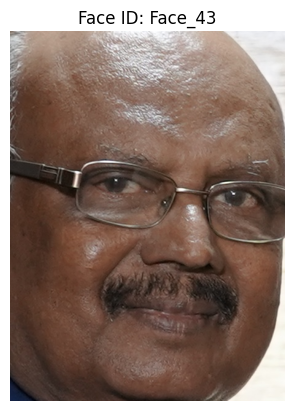

Faces aged (4-6):
New age(48-53)


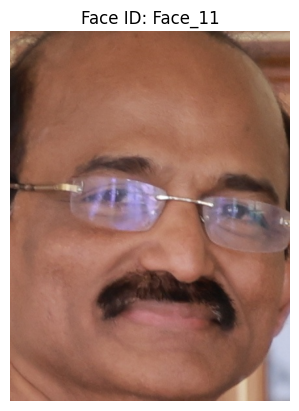

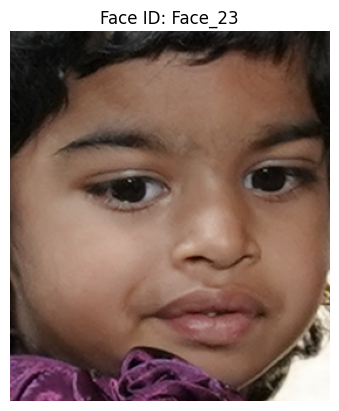

New age(48-53)


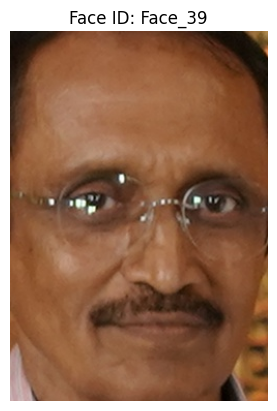

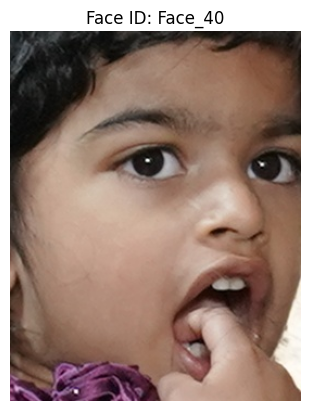

Faces aged (8-12):
New age(48-53)


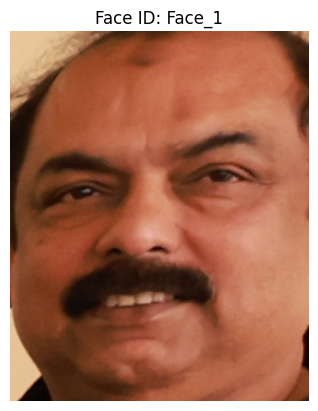

New age(48-53)


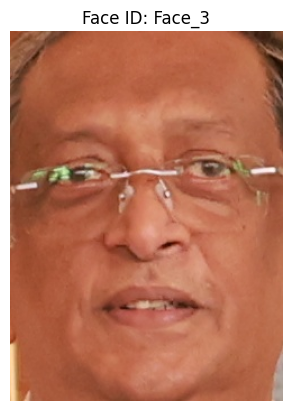

New age(48-53)


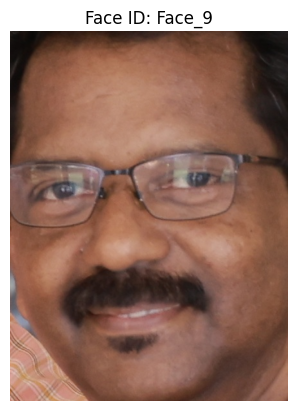

New age(48-53)


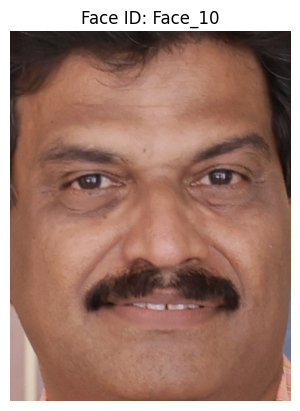

New age(48-53)


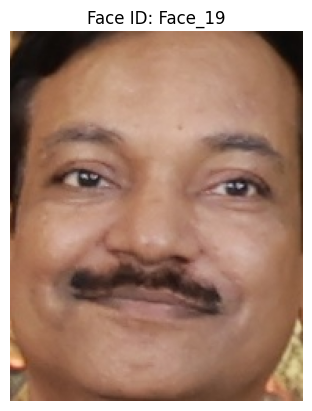

New age(48-53)


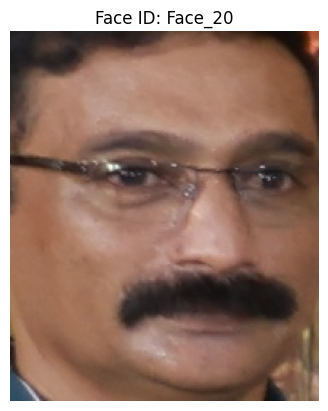

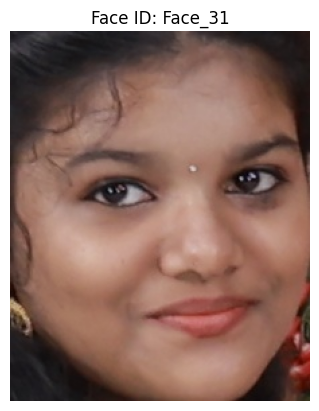

New age(48-53)


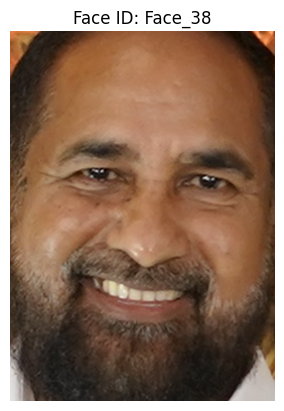

New age(48-53)


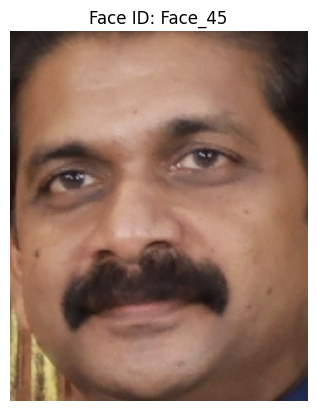

In [183]:
age_ranges_of_interest = ['(0-2)', '(4-6)', '(8-12)']

# Iterate through the age list
for age_range in age_ranges_of_interest:
    print(f"Faces aged {age_range}:")
    for i, age in enumerate(face_ages):
        if age.startswith(age_range):
            face_id = stored_faces_ids[i]
            if stored_faces_ids[i] not in ['Face_23', 'Face_40', 'Face_31']:
                face_ages[i] = '(48-53)'
                print(f"New age{face_ages[i]}")
            image_path = stored_faces_imgs[i]
            face_image = read_image(image_path)
            plt.imshow(cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.title(f"Face ID: {face_id}")
            plt.show()


In [186]:
faces_to_check = [] 

Faces aged (0-2):
Faces aged (4-6):


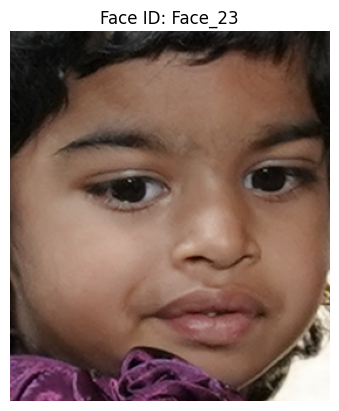

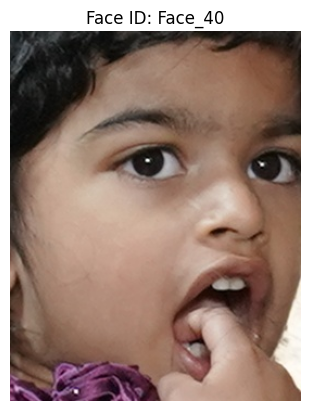

Faces aged (8-12):


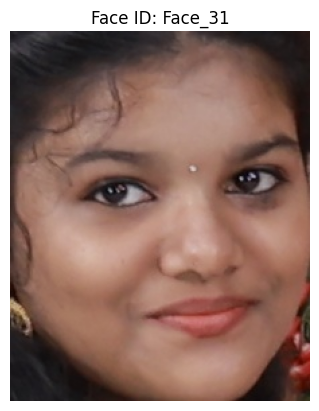

In [187]:
age_ranges_of_interest = ['(0-2)', '(4-6)', '(8-12)']

# Iterate through the age list
for age_range in age_ranges_of_interest:
    print(f"Faces aged {age_range}:")
    for i, age in enumerate(face_ages):
        if age.startswith(age_range):
            face_id = stored_faces_ids[i]
            image_path = stored_faces_imgs[i]
            face_image = read_image(image_path)
            plt.imshow(cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.title(f"Face ID: {face_id}")
            plt.show()
            faces_to_check.append(face_id)


In [188]:
faces_to_check

['Face_23', 'Face_40', 'Face_31']

In [189]:
# Initialize face links array
face_links = [None] * len(face_ages)

In [194]:
# Iterate through the faces to check
for face_id in faces_to_check:
    # Extract the index of the face id
    idx = int(face_id.split('_')[1]) - 1
    
    # Check if the count of lines in the txt file is less than or equal to 5
    if counts[idx] <= 5:
        # Read the content of the group image txt file
        with open(face_group_images[idx], 'r') as f:
            group_content = f.read().splitlines()
        
        # Check if the current txt file is a subset of other txt files
        for i, stored_path in enumerate(face_group_images):
            # Skip the current face and faces with counts greater than 5
            if i == idx or counts[i] > 5 or i == 15:
                continue
            
            with open(stored_path, 'r') as f:
                content_to_check = f.read().splitlines()
                
            # Check if the content of the current txt file is a subset of the other txt file
            if set(group_content).issubset(set(content_to_check)):
                # Store the index of the matching face
                face_links[idx] = i
                break

In [195]:
# Display face links
for i, link in enumerate(face_links):
    if link is not None:
        print(f"Face_{i+1} is a subset of Face_{link+1}")

Face_31 is a subset of Face_26
Face_40 is a subset of Face_21


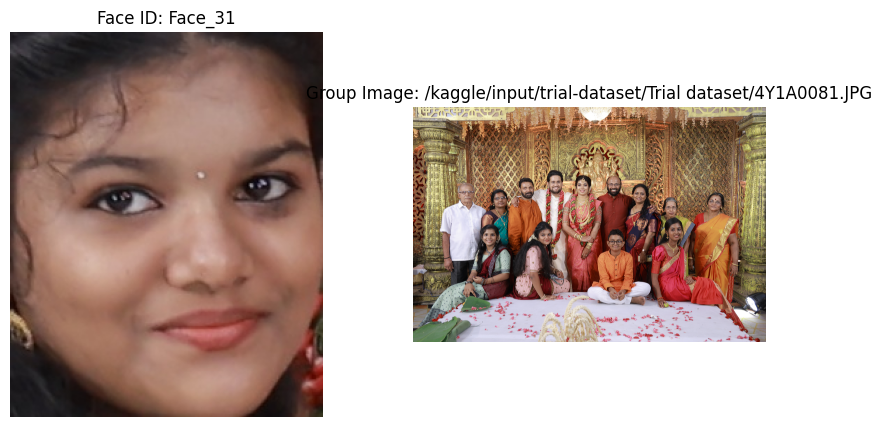

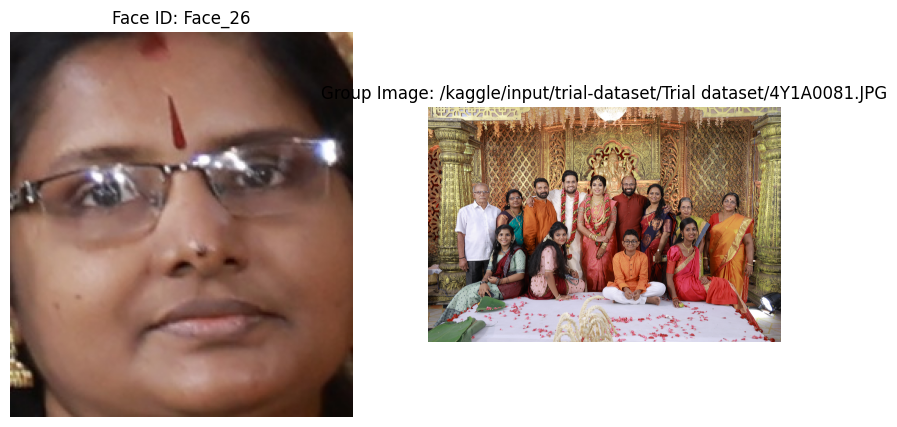

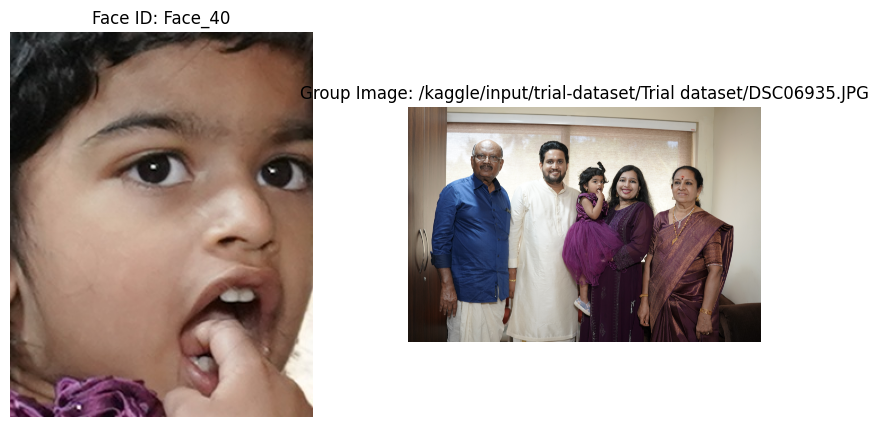

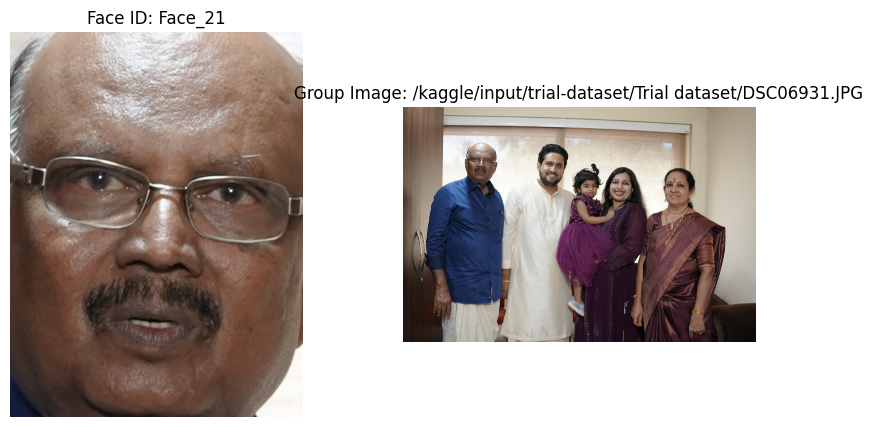

In [198]:
import cv2
import matplotlib.pyplot as plt

# Function to display face and corresponding group image
def display_face_and_group(face_id, group_id):
    # Load face image
    face_image_path = stored_faces_imgs[face_id]
    face_image = cv2.imread(face_image_path)
    
    # Load group image
    group_image_path = face_group_images[group_id]
    with open(group_image_path, 'r') as f:
        group_image_path = f.readline().strip()  # Get the first line which contains the path
    group_image = cv2.imread(group_image_path)
    
    # Display face and group image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Face ID: {stored_faces_ids[face_id]}")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(group_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Group Image: {group_image_path}")
    plt.axis('off')
    
    plt.show()

# Display faces and corresponding group images
display_face_and_group(30, 30)  # Face_31, Face_26
display_face_and_group(25, 25)  # Face_26, Face_26
display_face_and_group(39, 39)  # Face_40, Face_21
display_face_and_group(20, 20)  # Face_21, Face_21



In [200]:
print(len(stored_faces_ids))
print(len(stored_faces_imgs))
print(len(face_group_images))
print(len(face_ages))
print(len(face_links))
print(len(counts))

49
49
49
49
49
49


In [202]:
import pandas as pd

# Assuming you have the following arrays available:
# stored_faces_ids, stored_faces_imgs, ages, face_links, face_group_images

# Create a dictionary with column names and corresponding data
data = {
    'stored_faces_id': stored_faces_ids,
    'stored_faces_img': stored_faces_imgs,
    'age': face_ages,
    'potential_link': face_links,
    'status': ['unconfirmed' if link is not None else '' for link in face_links],
    'face_group_images': face_group_images,
    'Count' : counts,
    'email': [None] * len(stored_faces_ids)  # Filling with null values for now
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

   stored_faces_id                          stored_faces_img      age  \
0           Face_1   /kaggle/working/stored_faces/Face_1.jpg  (48-53)   
1           Face_2   /kaggle/working/stored_faces/Face_2.jpg  (25-32)   
2           Face_3   /kaggle/working/stored_faces/Face_3.jpg  (48-53)   
3           Face_4   /kaggle/working/stored_faces/Face_4.jpg  (25-32)   
4           Face_5   /kaggle/working/stored_faces/Face_5.jpg  (48-53)   
5           Face_6   /kaggle/working/stored_faces/Face_6.jpg  (38-43)   
6           Face_7   /kaggle/working/stored_faces/Face_7.jpg  (48-53)   
7           Face_8   /kaggle/working/stored_faces/Face_8.jpg  (48-53)   
8           Face_9   /kaggle/working/stored_faces/Face_9.jpg  (48-53)   
9          Face_10  /kaggle/working/stored_faces/Face_10.jpg  (48-53)   
10         Face_11  /kaggle/working/stored_faces/Face_11.jpg  (48-53)   
11         Face_12  /kaggle/working/stored_faces/Face_12.jpg  (15-20)   
12         Face_13  /kaggle/working/stored_faces/Fa

In [203]:
pip install tabulate


Note: you may need to restart the kernel to use updated packages.


In [204]:
from tabulate import tabulate

# Display the DataFrame as a table
print(tabulate(df, headers='keys', tablefmt='pipe', showindex=False))


| stored_faces_id   | stored_faces_img                         | age     |   potential_link | status      | face_group_images                                    |   Count | email   |
|:------------------|:-----------------------------------------|:--------|-----------------:|:------------|:-----------------------------------------------------|--------:|:--------|
| Face_1            | /kaggle/working/stored_faces/Face_1.jpg  | (48-53) |              nan |             | /kaggle/working/group_images/face_1_group_image.txt  |       1 |         |
| Face_2            | /kaggle/working/stored_faces/Face_2.jpg  | (25-32) |              nan |             | /kaggle/working/group_images/face_2_group_image.txt  |       6 |         |
| Face_3            | /kaggle/working/stored_faces/Face_3.jpg  | (48-53) |              nan |             | /kaggle/working/group_images/face_3_group_image.txt  |       1 |         |
| Face_4            | /kaggle/working/stored_faces/Face_4.jpg  | (25-32) |           